<a href="https://colab.research.google.com/github/Koti-RK/Retail-Sales-Prediction/blob/main/Retail_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# importing libraries

import pandas as pd
import numpy as np

from pandas import datetime as dt
from pandas import Series,DataFrame

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


from sklearn.model_selection import train_test_split


# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection

<ipython-input-63-4af7114a1d65>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime as dt


In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
rossman_df= pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction/Rossmann Stores Data.csv')

<ipython-input-65-7436a05683c3>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_df= pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction/Rossmann Stores Data.csv')


In [66]:
store_df = pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction/store.csv')

In [67]:
rossman_df.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
510052,168,1,2014-03-31,11241,999,1,1,0,0
622579,80,5,2013-12-20,11828,877,1,1,0,0
211871,22,4,2015-01-22,3647,453,1,0,0,0
165991,972,4,2015-03-05,3392,379,1,1,0,0
731457,803,6,2013-09-14,5122,464,1,0,0,0
325074,963,7,2014-09-28,0,0,0,0,0,0
207959,570,1,2015-01-26,4557,673,1,1,0,0
538555,796,4,2014-03-06,7815,790,1,1,0,0
645631,832,6,2013-11-30,9102,735,1,0,0,0
301479,703,4,2014-10-23,4000,388,1,1,0,0


In [68]:
rossman_df.shape

(1017209, 9)

In [69]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [70]:
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [71]:
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [72]:
#no of stores
rossman_df.Store.nunique()

1115

In [74]:
#manipulation
# extracting  year, month, day and week of year from Date

rossman_df["Date"]=pd.to_datetime(rossman_df["Date"])
rossman_df["Year"]=rossman_df["Date"].dt.year
rossman_df["Month"]=rossman_df["Date"].dt.month
rossman_df["Day"]=rossman_df["Date"].dt.day
rossman_df["Week"]=rossman_df["Date"].dt.week%4
rossman_df["WeekOfYear"]=rossman_df["Date"].dt.week

<ipython-input-74-d824cc46c776>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  rossman_df["Week"]=rossman_df["Date"].dt.week%4
<ipython-input-74-d824cc46c776>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  rossman_df["WeekOfYear"]=rossman_df["Date"].dt.week


In [75]:
rossman_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1


In [73]:
store_df.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
614,615,d,a,730.0,8.0,2007.0,0,NaN,NaN,NaN
999,1000,a,c,2230.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
154,155,d,a,3050.0,NaN,NaN,1,35.0,2010.0,"Jan,Apr,Jul,Oct"
1075,1076,a,c,90.0,NaN,NaN,1,1.0,2013.0,"Jan,Apr,Jul,Oct"
1022,1023,c,a,3740.0,2.0,2002.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
244,245,a,c,1310.0,NaN,NaN,0,NaN,NaN,NaN
681,682,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
334,335,b,a,90.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
80,81,a,a,2370.0,3.0,2011.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
733,734,a,a,220.0,NaN,NaN,1,36.0,2013.0,"Mar,Jun,Sept,Dec"


In [76]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [77]:
#checking null values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

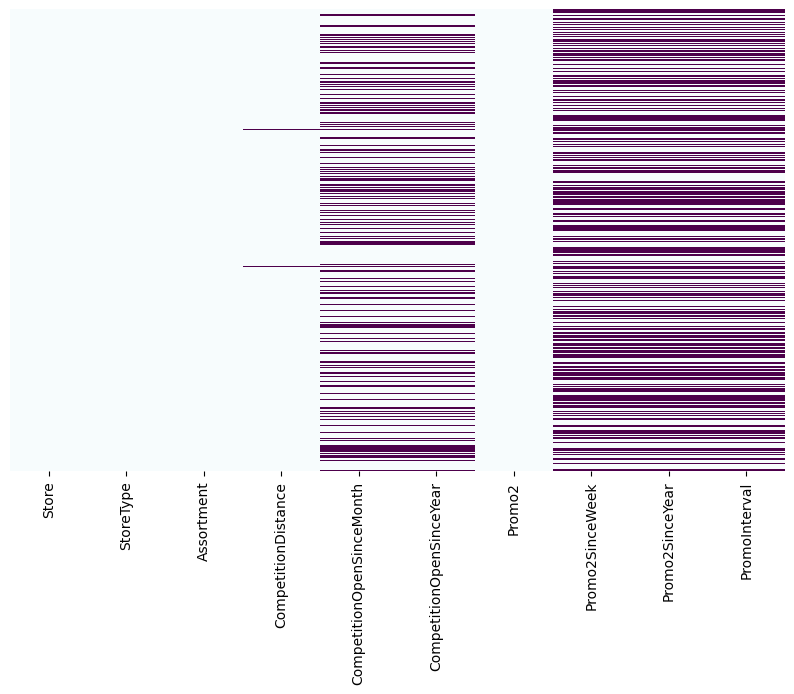

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'BuPu')

<ipython-input-79-16ade098606b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_df.CompetitionDistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

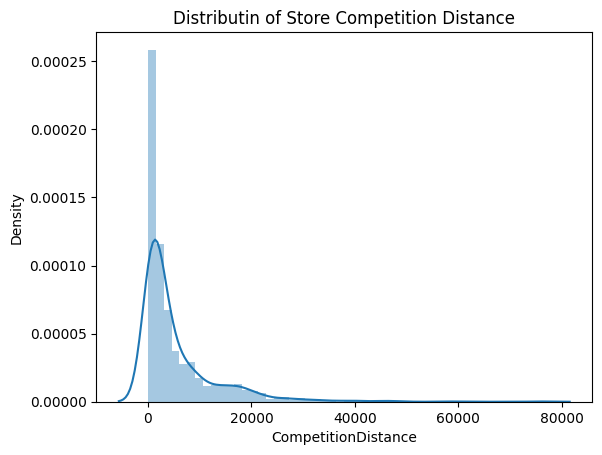

In [79]:
sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

Skewed towards right.. we replace this with median

In [80]:
#dealing with null values
store_df['CompetitionOpenSinceMonth'].mode()

0    9.0
Name: CompetitionOpenSinceMonth, dtype: float64

we replace these with mode because it is not wise to replace with average or middle value for these approx date and time.

In [81]:
store_df['CompetitionOpenSinceYear'].mode()

0    2013.0
Name: CompetitionOpenSinceYear, dtype: float64

In [82]:
# Replacing null values
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [83]:
# Replacing null values
store_df['Promo2SinceWeek'].fillna(0, inplace = True)
store_df['Promo2SinceYear'].fillna(0, inplace = True)
store_df['PromoInterval'].fillna(0, inplace = True)

we replace nan with 0 when there is no promotion.

In [84]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1113,1114,a,c,870.0,9.0,2013.0,0,0.0,0.0,0


In [85]:
# merging data frames
merged_df = rossman_df.merge(store_df, how='outer', on=['Store'])

In [86]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Week',
       'WeekOfYear', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  Day                        1017209 no

In [88]:
#add percentage annotations to a plot
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [89]:
# adding percentages
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
     

In [90]:
merged_df['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [91]:
ax = sns.countplot(merged_df['StoreType'])
without_hue(ax, merged_df['StoreType'])

ValueError: ignored